In [1]:
# Import required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset into a dataframe
data = pd.read_csv('hr_employee_churn_data.csv')
data.head() # Check the top 5 rows

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [4]:
# Get info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [6]:
data.shape # Check the shape attribute of the data

(14999, 10)

In [13]:
# Check for missing values
data.isnull().sum()

empid                    0
satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

The **satisfaction_level** column has 2 rows with missing values. This will be dealt with later

In [7]:
# Get column description of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
empid,14999.0,7500.000000,4329.982679,1.00,3750.50,7500.00,11249.50,14999.0
satisfaction_level,14997.0,0.612863,0.248634,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0


### Exploratory Analysis columns

#### Catrgorical features

In [9]:
# Check the unique values of some columns
columns_to_check = ['left', 'promotion_last_5years', 'Work_accident', 'number_project', 'time_spend_company']
for col in columns_to_check:
    print(col)
    print('The unique values are:', data[col].unique())
    print()

left
The unique values are: [1 0]

promotion_last_5years
The unique values are: [0 1]

Work_accident
The unique values are: [0 1]

number_project
The unique values are: [2 5 7 6 4 3]

time_spend_company
The unique values are: [ 3  6  4  5  2  8 10  7]



0    11428
1     3571
Name: left, dtype: int64

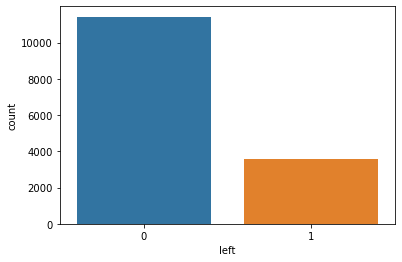

In [12]:
# Check the distribution of the target variable: left
sns.countplot(x='left', data=data) # visualize the distribution
data['left'].value_counts()

This indicates data imbalance because of the large ratio of 0s to 1s

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

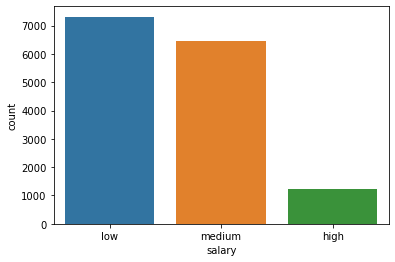

In [14]:
# Check the distribution of the feature variable: salary
sns.countplot(x='salary', data=data) # visualize the distribution
data['salary'].value_counts()

The number of low income earners is considerably higher than the high income earners. 

#### Check the distribution of employee retention (left) with respect to their income class (salary)

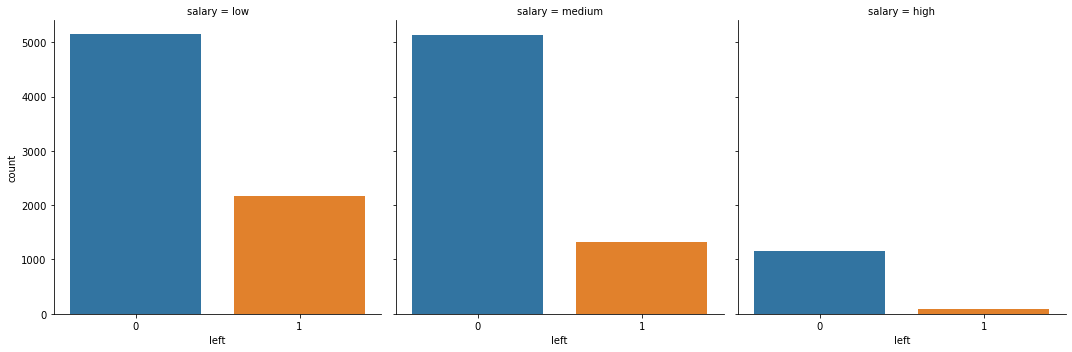

In [23]:
# Check the distribution of the target variable: left
sns.catplot(x='left', col='salary', kind='count', data=data) # visualize the distribution

The distribution suggests that there is a correlation between the income level and the decision of employees to either leave or stay with the company. Low income earners seem to have a higher churn rate compared to mid and high income earners.

0    14680
1      319
Name: promotion_last_5years, dtype: int64

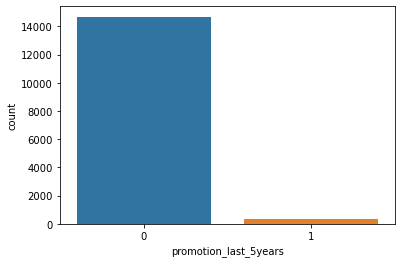

In [29]:
# Check the distribution of the feature variable: salary
sns.countplot(x='promotion_last_5years', data=data) # visualize the distribution
data['promotion_last_5years'].value_counts()

Very few people were promoted within the last 5 years 

#### Check the distribution of employee retention (left) with respect to promotion (promotion_last_5years)

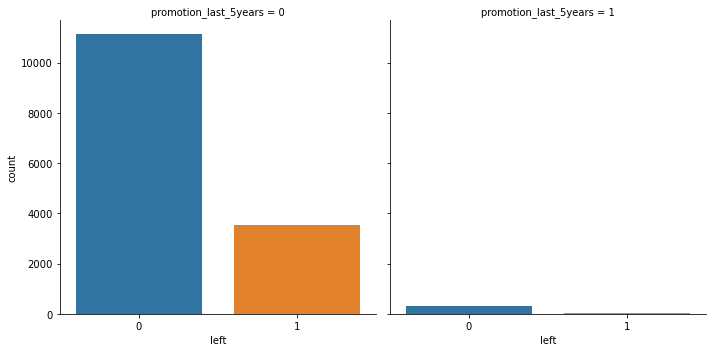

In [27]:
# Check the distribution of the target variable: left
sns.catplot(x='left', col='promotion_last_5years', kind='count', data=data) # visualize the distribution

There isn't enough data for credible inference. The number of data points for individuals who were promoted within a 5-year period. However, there seems to be high churn rate in employees who weren't promoted in the last 5 years

0    12830
1     2169
Name: Work_accident, dtype: int64

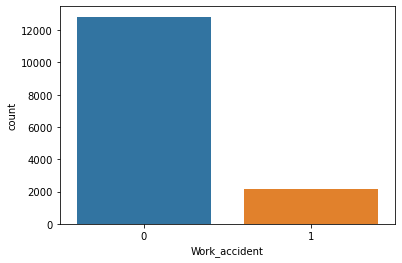

In [30]:
# Check the distribution of the feature variable: salary
sns.countplot(x='Work_accident', data=data) # visualize the distribution
data['Work_accident'].value_counts()

Number of employee with work-related accidents is small

#### Check the distribution of employee retention (left) with respect to work-place related accident (Work_accident)

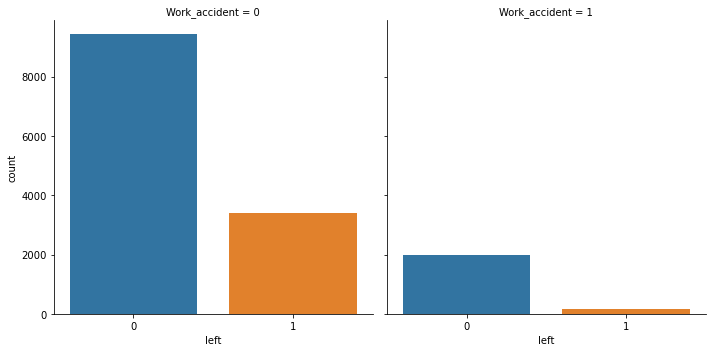

In [31]:
# Check the distribution of the target variable: left
sns.catplot(x='left', col='Work_accident', kind='count', data=data) # visualize the distribution

There is a greater churn among employees who were not involved in work-place accident. That means this feature may not be a good predictor of churn

#### Numerical features

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

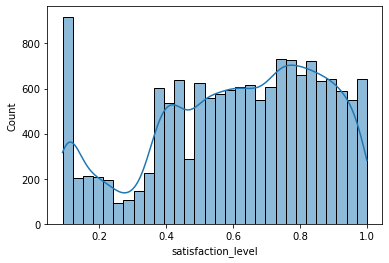

In [42]:
# Plot the univariate distribution of the satisfaction_level
sns.histplot(x='satisfaction_level', data=data, kde=True)

The mode of the distribution is about 0.1

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

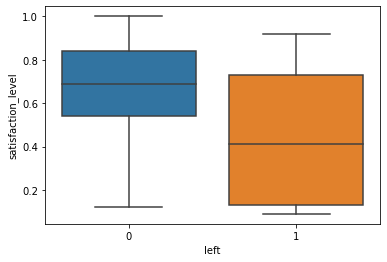

In [43]:
# Check the distribution of the satisfaction level wrt churn
sns.boxplot(x='left', y='satisfaction_level', data=data)

This shows that the mean satisfaction_level for employee that left is about 0.4 and the range is from 0.2 to approximately 0.7

<AxesSubplot:xlabel='number_project', ylabel='Count'>

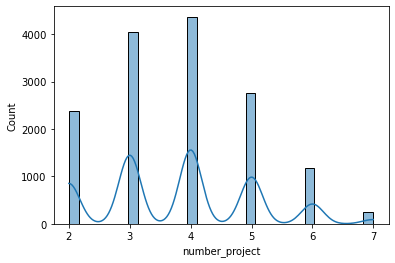

In [45]:
# Plot the univariate distribution of the number_project
sns.histplot(x='number_project', data=data, kde=True)

Most employees seem to be managing 4 projects

<AxesSubplot:xlabel='left', ylabel='number_project'>

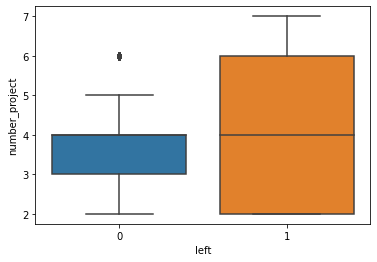

In [46]:
# Check the distribution of the number_project wrt churn
sns.boxplot(x='left', y='number_project', data=data)

Most employees managing between 3 to 4 projects seem to remain in the company while employees with larger number of projects seem to leave

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

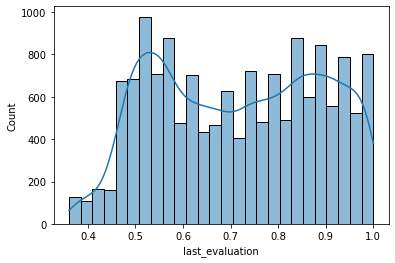

In [47]:
# Plot the univariate distribution of the last_evaluation
sns.histplot(x='last_evaluation', data=data, kde=True)

The last evaluation score of most employees is around 0.5

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

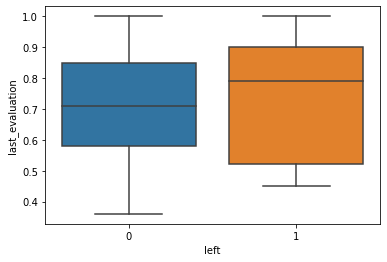

In [49]:
# Check the distribution of the last_evaluation wrt churn
sns.boxplot(x='left', y='last_evaluation', data=data)

The last_evaluation score doesn't seem to affect churn. However, employees with very high evaluation seem to leave the company.

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

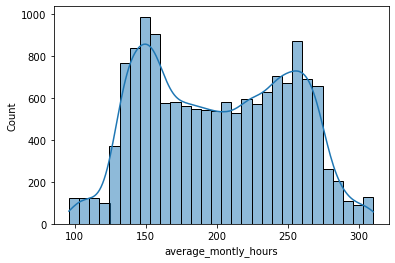

In [52]:
# Plot the univariate distribution of the average_monthly_hours
sns.histplot(x='average_montly_hours', data=data, kde=True)

The distribution of the average monthly hours seems to be bimodal. 

<AxesSubplot:xlabel='left', ylabel='average_montly_hours'>

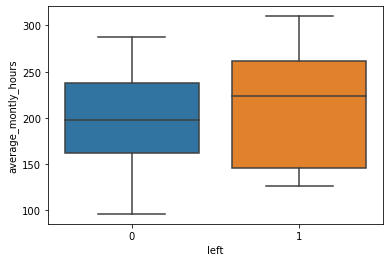

In [53]:
# Check the distribution of the average_monthly_hours wrt churn
sns.boxplot(x='left', y='average_montly_hours', data=data)

Employees with the lowest and highest average monthly hours tend to leave

<AxesSubplot:>

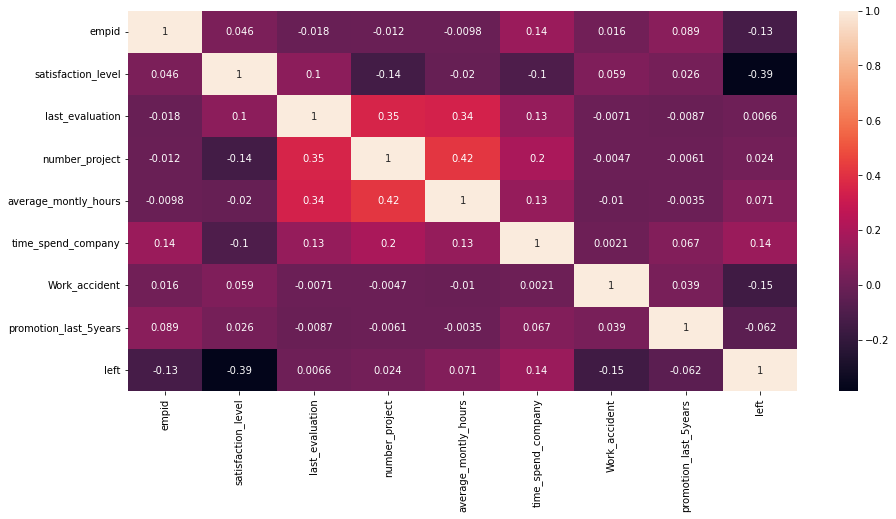

In [55]:
# Check for correlation between columns
corr = data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True)

The correlation between the features and target (left) is low. The highest correlated feature is **satisfaction_level** with a negative correlation of **-0.39**. For feature-to-feature correlation, the highest correlated features are **number_project** and **average_montly_hours** with a positive correlation value of **0.42**.

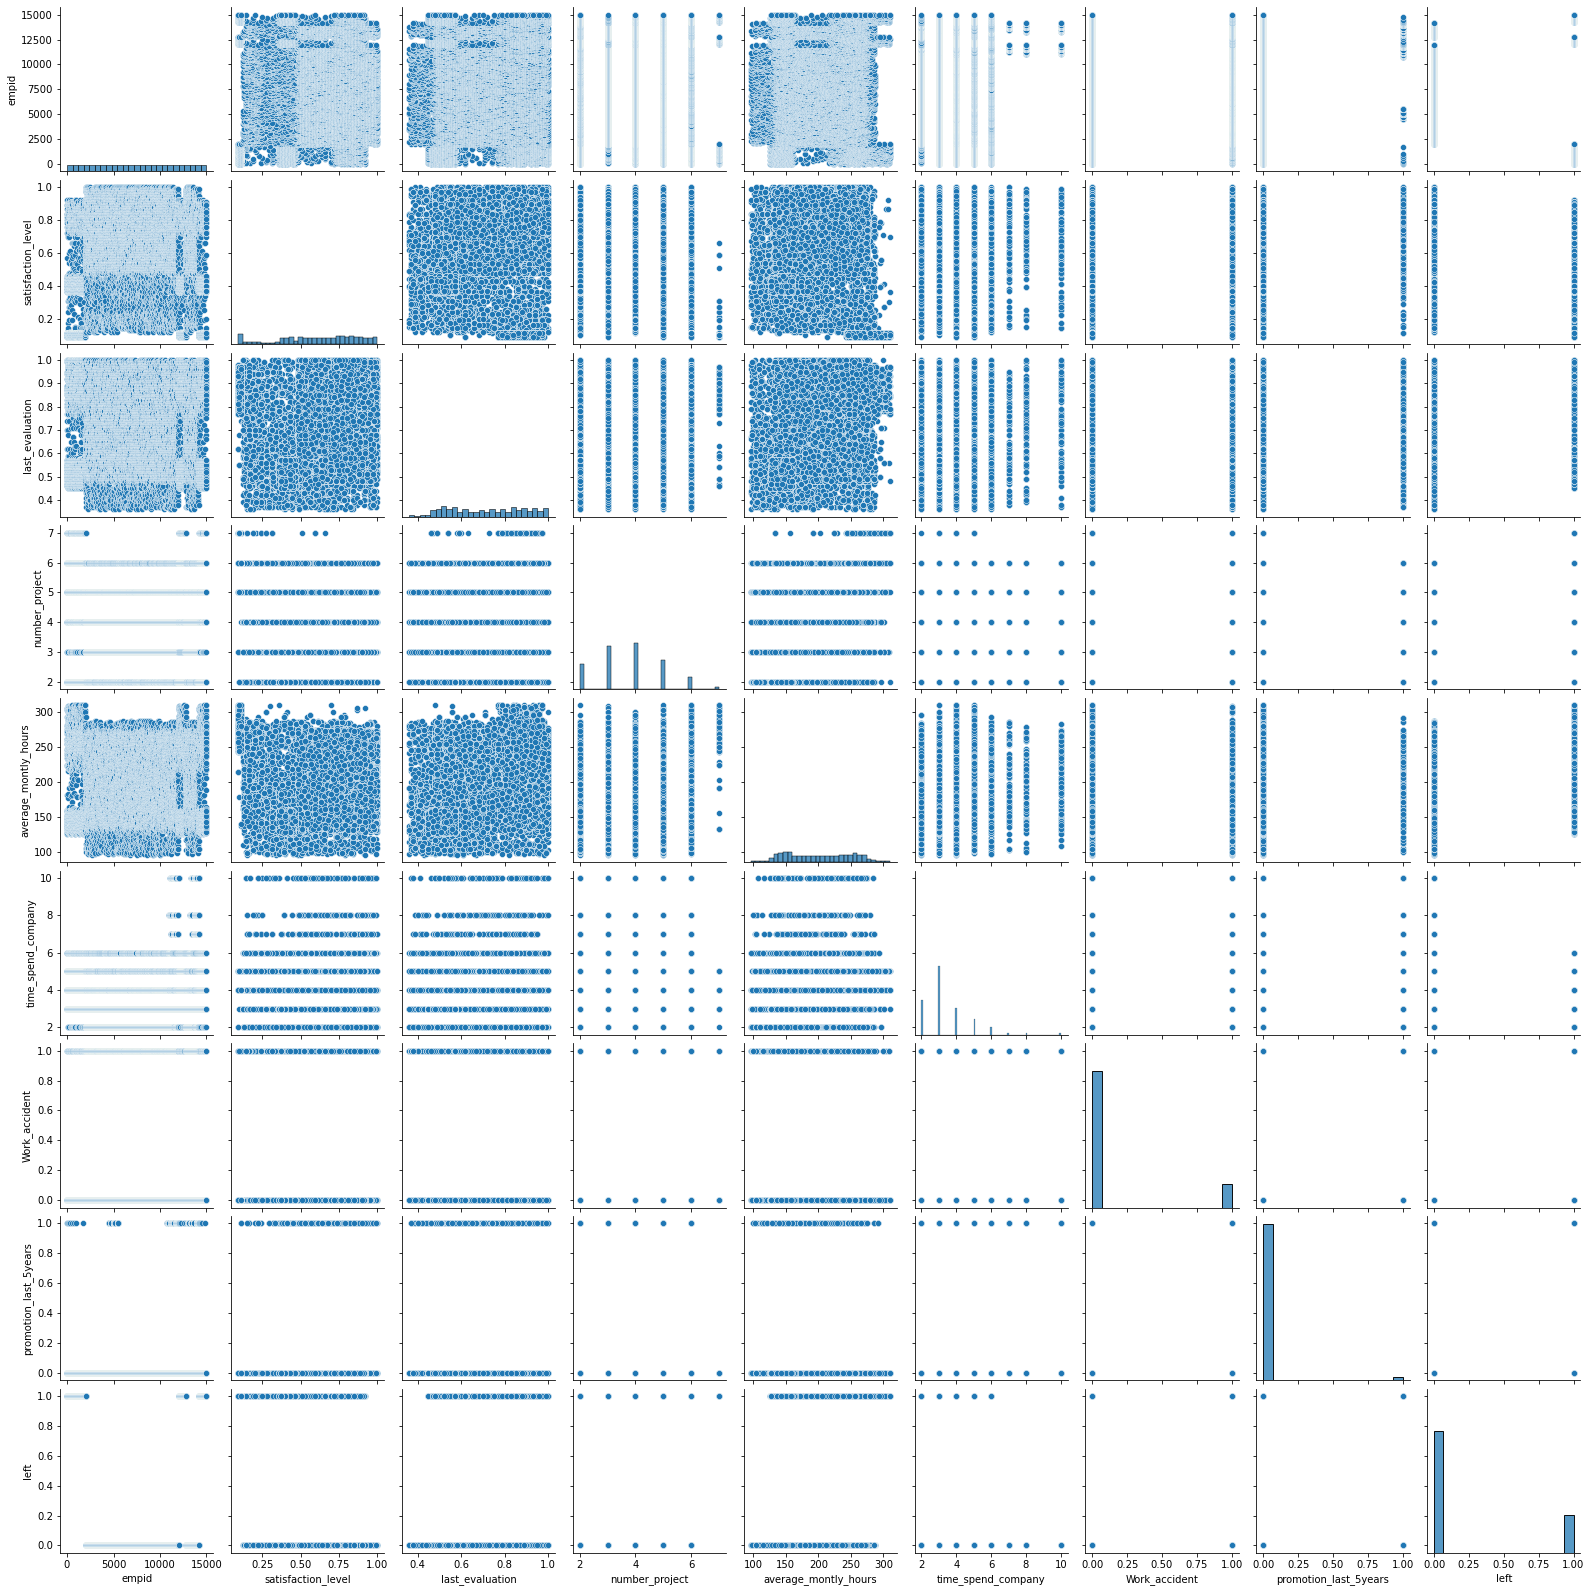

In [56]:
# Check the pairplot
sns.pairplot(data)

A quick view at the pairplots show the earlier explained weak correlation between features and targets.